In [1]:
import pandas_datareader as pdr

In [2]:
import requests

api_key = '1fb09ab6945c3ec3a50df8c02d5b65ecf8ce5975'
url = "https://api.tiingo.com/tiingo/daily/AAPL/prices"
params = {"token": api_key}

response = requests.get(url, params=params)

if response.status_code == 200:
    print("API connection successful!")
    print(response.json())
else:
    print(f"Error: {response.status_code}")
    print(response.text)


API connection successful!
[{'adjClose': 216.98, 'adjHigh': 221.75, 'adjLow': 214.91, 'adjOpen': 220.14, 'adjVolume': 62547467, 'close': 216.98, 'date': '2025-03-12T00:00:00+00:00', 'divCash': 0.0, 'high': 221.75, 'low': 214.91, 'open': 220.14, 'splitFactor': 1.0, 'volume': 62547467}]


In [3]:
!pip install tiingo


In [4]:
from tiingo import TiingoClient
import pandas as pd

# Configure Tiingo API key
config = {
    'session': True,
    'api_key': '1fb09ab6945c3ec3a50df8c02d5b65ecf8ce5975'
}
client = TiingoClient(config)

# Fetch historical prices for GOOGL
historical_prices = client.get_ticker_price(
    "AAPL",
    startDate="2015-01-01",
    endDate="2020-05-22",
    frequency="daily"
)

# Convert the result to a DataFrame
df = pd.DataFrame(historical_prices)

# Save to CSV
df.to_csv('AAPL.csv', index=False)

# Print data shape and tail
print(df.shape)
print(df.tail())

(1357, 13)
                          date   close    high     low    open    volume  \
1352  2020-05-18T00:00:00.000Z  314.96  316.50  310.32  313.17  33843125   
1353  2020-05-19T00:00:00.000Z  313.14  318.52  313.01  315.03  25432385   
1354  2020-05-20T00:00:00.000Z  319.23  319.52  316.52  316.68  27876215   
1355  2020-05-21T00:00:00.000Z  316.85  320.89  315.87  318.66  25672211   
1356  2020-05-22T00:00:00.000Z  318.89  319.23  315.35  315.77  20450754   

       adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  \
1352  76.640226  77.014959  75.511160  76.204659  135372500      0.0   
1353  76.197359  77.506492  76.165726  76.657259  101729540      0.0   
1354  77.679258  77.749825  77.019825  77.058759  111504860      0.0   
1355  77.100125  78.083192  76.861659  77.540558  102688844      0.0   
1356  77.596525  77.679258  76.735126  76.837326   81803016      0.0   

      splitFactor  
1352          1.0  
1353          1.0  
1354          1.0  
1355          1.0  

In [5]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02T00:00:00.000Z,109.33,111.44,107.350,111.39,53204626,24.319206,24.788551,23.878778,24.777430,212818504,0.0,1.0
1,2015-01-05T00:00:00.000Z,106.25,108.65,105.410,108.29,64285491,23.634095,24.167948,23.447247,24.087870,257141964,0.0,1.0
2,2015-01-06T00:00:00.000Z,106.26,107.43,104.630,106.54,65797116,23.636320,23.896573,23.273745,23.698603,263188464,0.0,1.0
3,2015-01-07T00:00:00.000Z,107.75,108.20,106.695,107.20,40105934,23.967753,24.067851,23.733081,23.845412,160423736,0.0,1.0
4,2015-01-08T00:00:00.000Z,111.89,112.15,108.700,109.23,59364547,24.888649,24.946483,24.179070,24.296962,237458188,0.0,1.0


In [6]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1352,2020-05-18T00:00:00.000Z,314.96,316.50,310.32,313.17,33843125,76.640226,77.014959,75.511160,76.204659,135372500,0.0,1.0
1353,2020-05-19T00:00:00.000Z,313.14,318.52,313.01,315.03,25432385,76.197359,77.506492,76.165726,76.657259,101729540,0.0,1.0
1354,2020-05-20T00:00:00.000Z,319.23,319.52,316.52,316.68,27876215,77.679258,77.749825,77.019825,77.058759,111504860,0.0,1.0
1355,2020-05-21T00:00:00.000Z,316.85,320.89,315.87,318.66,25672211,77.100125,78.083192,76.861659,77.540558,102688844,0.0,1.0
1356,2020-05-22T00:00:00.000Z,318.89,319.23,315.35,315.77,20450754,77.596525,77.679258,76.735126,76.837326,81803016,0.0,1.0


In [7]:
df1=df.reset_index()['close']

In [8]:
df1.shape

(1357,)

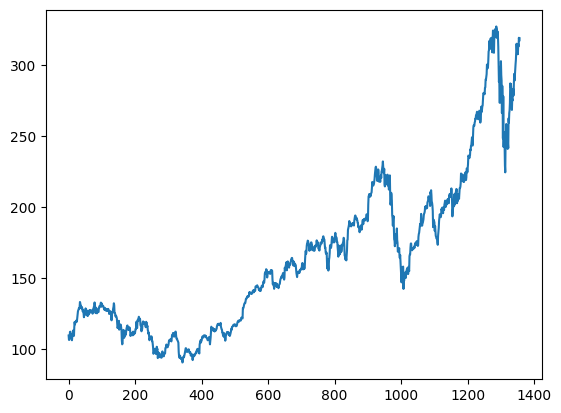

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(1357, 1)

In [13]:
df1

array([[0.08017394],
       [0.06717048],
       [0.0672127 ],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [14]:
## splitting the dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [15]:
training_size,test_size

(882, 475)

In [16]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [17]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [18]:
print(X_train)

[[0.08017394 0.06717048 0.0672127  ... 0.17816432 0.16583636 0.17607447]
 [0.06717048 0.0672127  0.07350334 ... 0.16583636 0.17607447 0.17495567]
 [0.0672127  0.07350334 0.09098201 ... 0.17607447 0.17495567 0.16862282]
 ...
 [0.2792789  0.30689015 0.2921557  ... 0.38769737 0.39723888 0.39609896]
 [0.30689015 0.2921557  0.27362155 ... 0.39723888 0.39609896 0.40175631]
 [0.2921557  0.27362155 0.27894115 ... 0.39609896 0.40175631 0.40010977]]


In [19]:
print(X_train.shape),print(y_train.shape)

(781, 100)
(781,)


(None, None)

In [20]:
print(X_test.shape),print(y_test.shape)

(374, 100)
(374,)


(None, None)

In [21]:
#reshape input to be [samples,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [22]:
X_train.shape

(781, 100, 1)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()

# First LSTM layer with input shape defined
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))

# Second LSTM layer
model.add(LSTM(50, return_sequences=True))

# Third LSTM layer
model.add(LSTM(50))

# Dense layer to output a single value (e.g., for regression)
model.add(Dense(1))

# Compile the model with mean squared error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
## Training our model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0255 - val_loss: 0.0743
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0038 - val_loss: 0.0063
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.4325e-04 - val_loss: 0.0049
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1999e-04 - val_loss: 0.0048
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.8733e-04 - val_loss: 0.0041
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.9525e-04 - val_loss: 0.0040
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.3849e-04 - val_loss: 0.0048
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.8857e-04 - val_loss: 0.0046
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.3656e-04 - val_loss: 0.0057
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.3903e-04 - val_loss: 0.0043
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.6775e-04 - val_loss: 0.0036
Epoch 12/100
13

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.18.0'

In [28]:
#lets do the prediction and check performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [29]:
#transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
#Calculate RMSE performance metrices
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

135.45233979203599

In [31]:
#test data RMSE value
math.sqrt(mean_squared_error(y_test,test_predict))

226.28244418730765

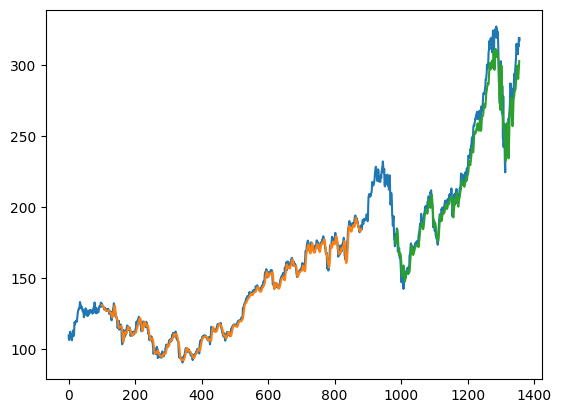

In [32]:
#Plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plotting baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

475

In [34]:
x_input=test_data[375:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
#demonstrate the prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.9051777]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(df1)

1357

In [40]:
df3=df1.tolist()
df3.extend(lst_output)

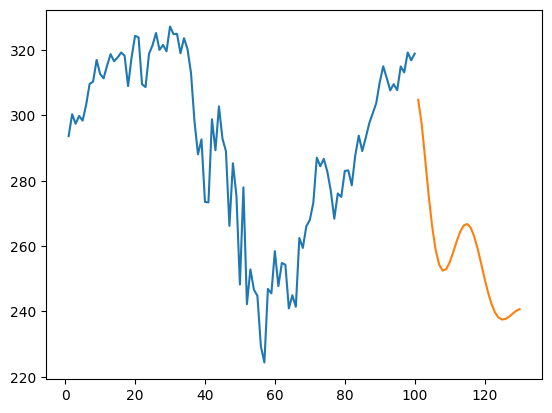

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1257:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

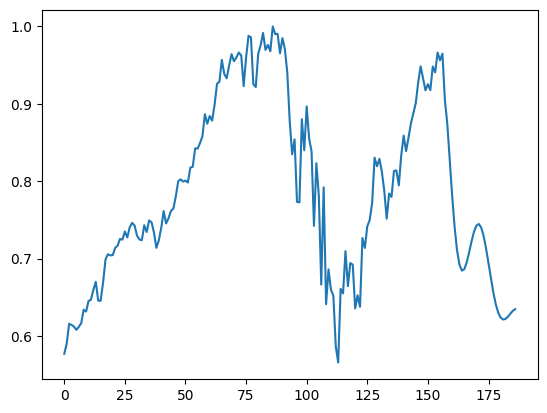

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])